In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
data = pd.read_csv('all_data.csv')

In [3]:
# visualize data info
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.75000

GDP data varies widely, and its values are extrememly large. So some preprocessing could be helpful.

In [4]:
#data['GDP'] = data['GDP'] / np.mean(data['GDP'])

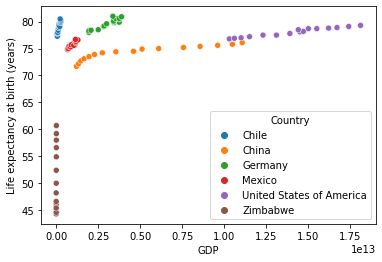

In [20]:
f, ax = plt.subplots()
sns.scatterplot(data=data, x= 'GDP', y='Life expectancy at birth (years)', hue='Country')
plt.show()

<h1>Initial Analysis</h1>
<p>Initial scatter plot shows that each country has a large amount of variance between one another in terms of GPD and Life Expectancy. <br> To the point that plotting all data together leads to no discernable conclusions when it comes to some countries such as Zimbabwe, or Mexico.</p>

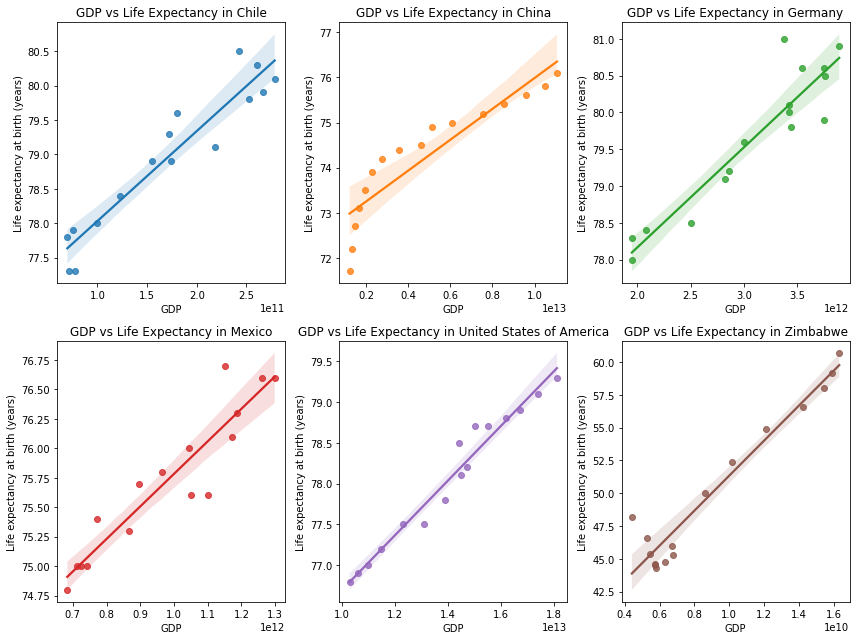

In [23]:
countries = data['Country'].unique()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
plt.figure(figsize=(12, 9))
for i in range(len(countries)):
    plt.subplot(2, 3, i+1)
    sns.regplot(data=data[data['Country'] == countries[i]], x= 'GDP', y='Life expectancy at birth (years)', color=colors[i], x_jitter=0.2)
    plt.title('GDP vs Life Expectancy in ' + countries[i])
plt.tight_layout()
plt.show()

<h1>Analysis</h1>
<p>For the most part the relationship between GPD and Life Expectancy is a positive correlation. Countries such as China and Zimbabwe seem to have some other factors that affect Life Expectancy, because China's relationship starts out more exponential and then later becomes linear, and  Zimbabwe has a small cluster where increases in GDP do not lead to an increase in Life Expectancy. 

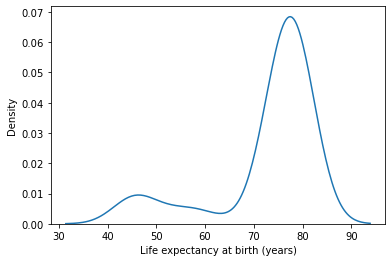

In [17]:
plt.subplots()
sns.kdeplot(data=data, x= 'Life expectancy at birth (years)')
plt.show()

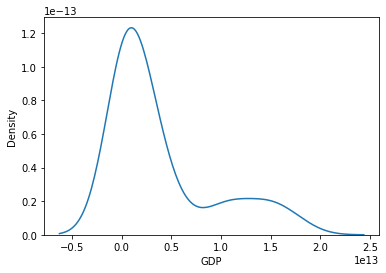

In [18]:
plt.subplots()
sns.kdeplot(data=data, x= 'GDP')
plt.show()